In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA

In [3]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/ontogeny_females.parquet')

In [4]:
df = pd.read_parquet(path)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10035847 entries, 0 to 10035846
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   experiment  object        
 1   file        object        
 2   syllables   int16         
 3   date        datetime64[ns]
 4   uuid        object        
 5   age         object        
dtypes: datetime64[ns](1), int16(1), object(4)
memory usage: 402.0+ MB


In [7]:
def compute_usage(df):
    onsets = np.where(np.diff(df['syllables']) != 0)[0]
    usage = df.loc[df.index[onsets], 'syllables'].value_counts(normalize=True)
    return usage

In [8]:
usages = df.groupby(['uuid', 'age'], observed=True, sort=False).apply(compute_usage)

In [14]:
usage_mtx = pd.pivot_table(usages.reset_index(), index=['uuid', 'age'], columns='level_2', values='syllables').fillna(0)

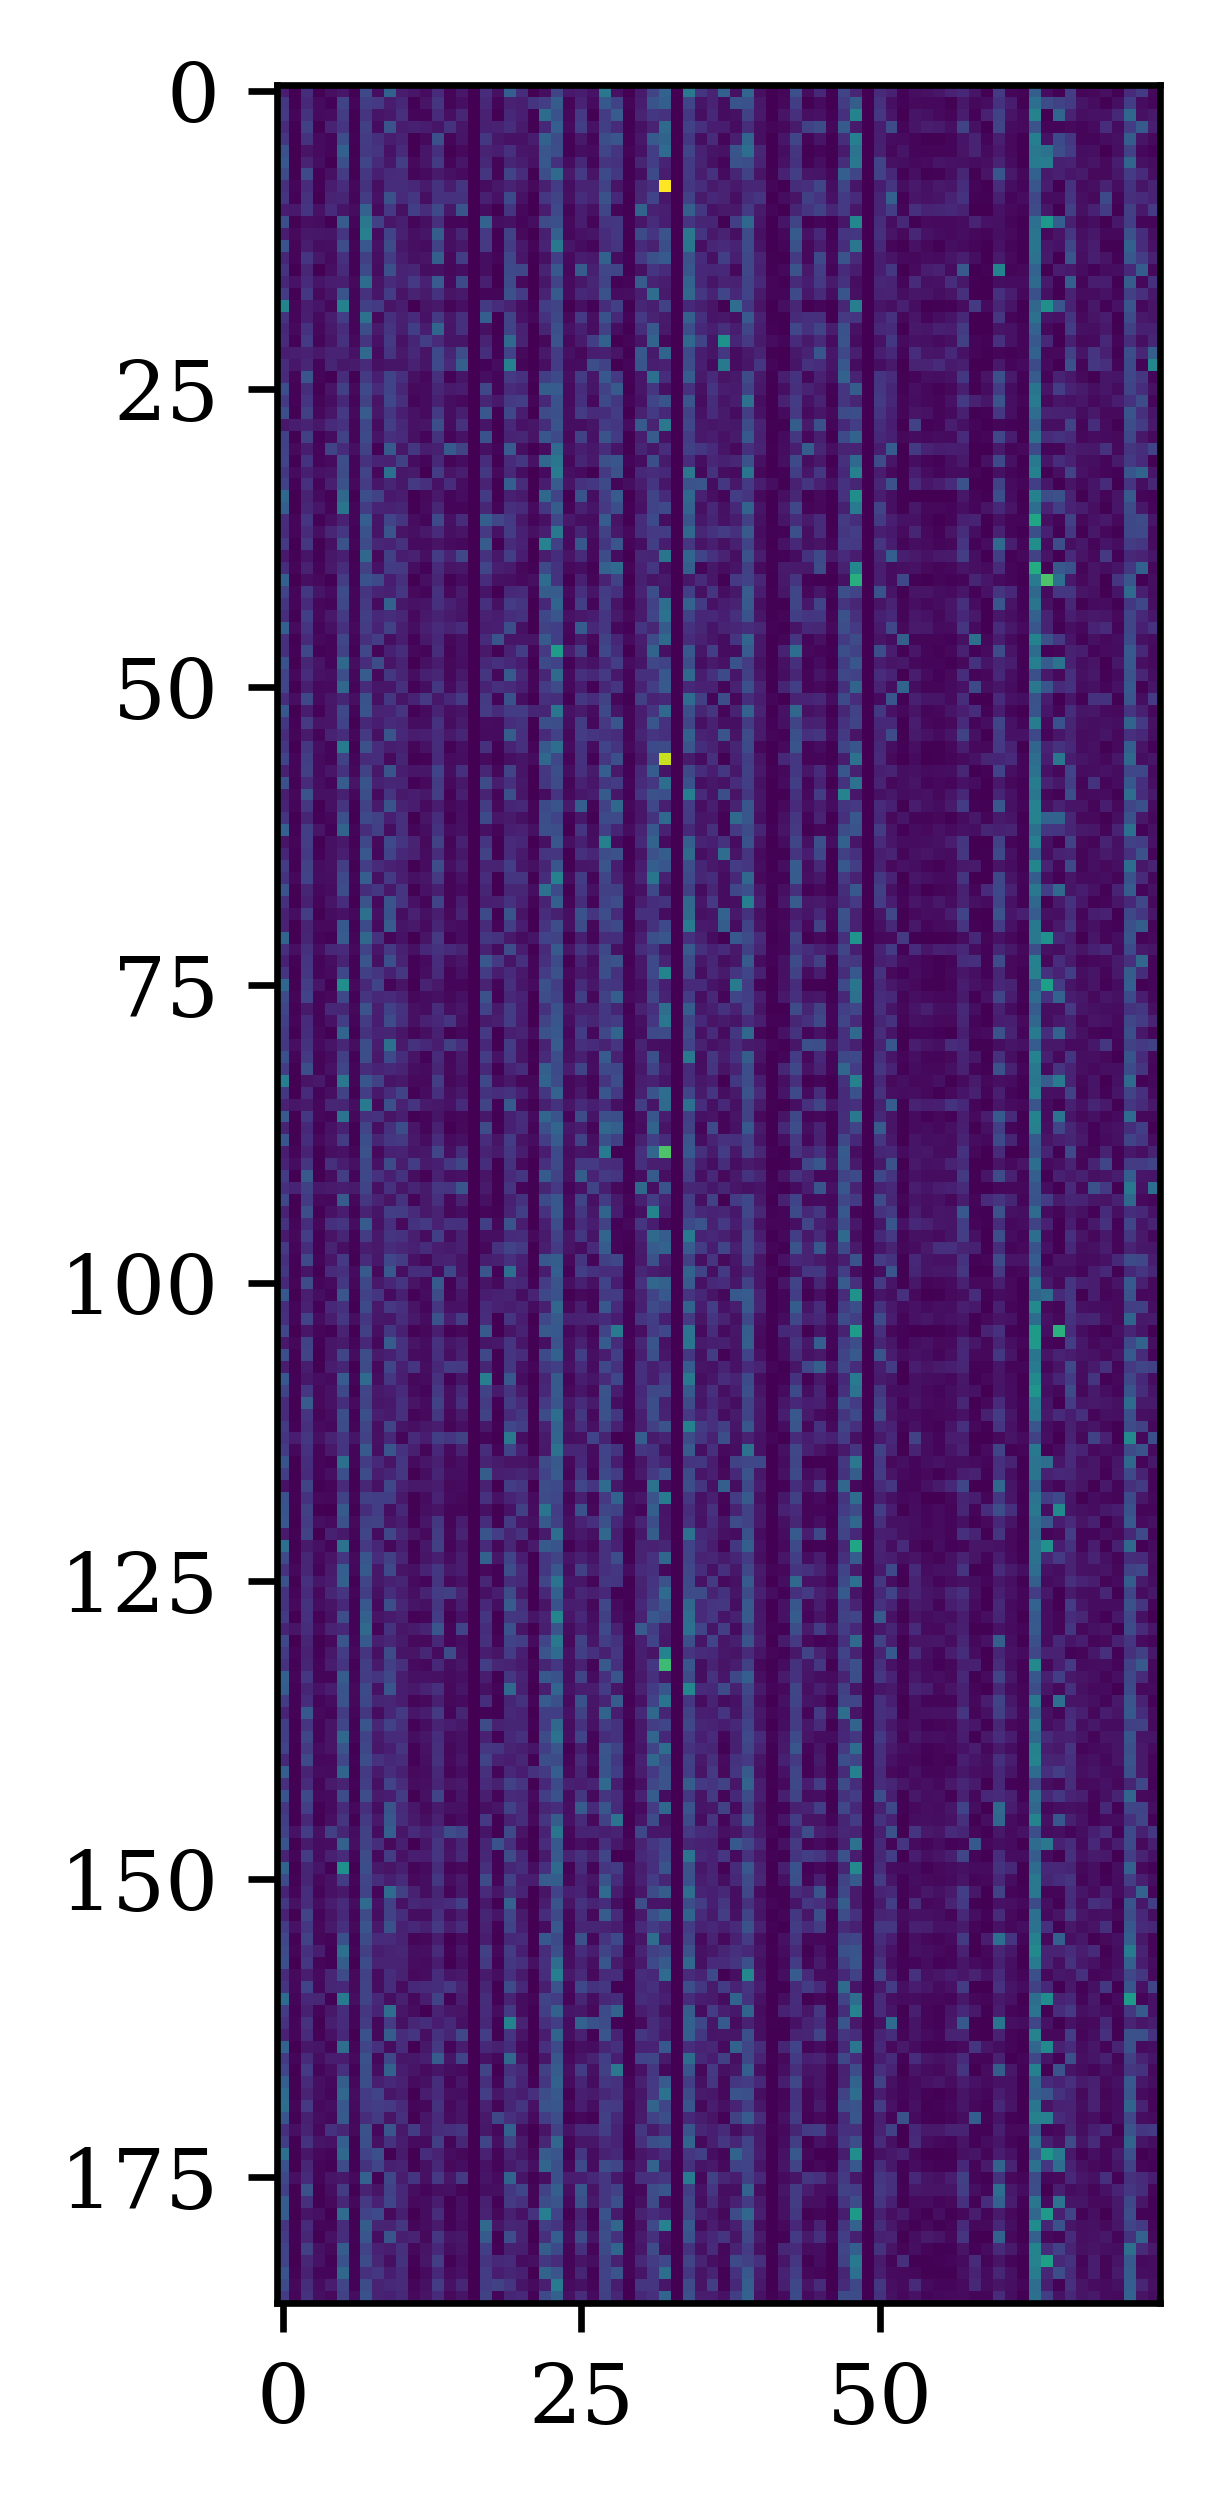

In [16]:
plt.imshow(usage_mtx)

In [17]:
pcs = PCA(n_components=2).fit_transform(np.log(usage_mtx + 1e-5))

In [18]:
pcs.shape

(186, 2)

In [22]:
ages = usage_mtx.index.get_level_values(1)

In [23]:
pc_df = pd.DataFrame(pcs)

In [25]:
pc_df['age'] = ages

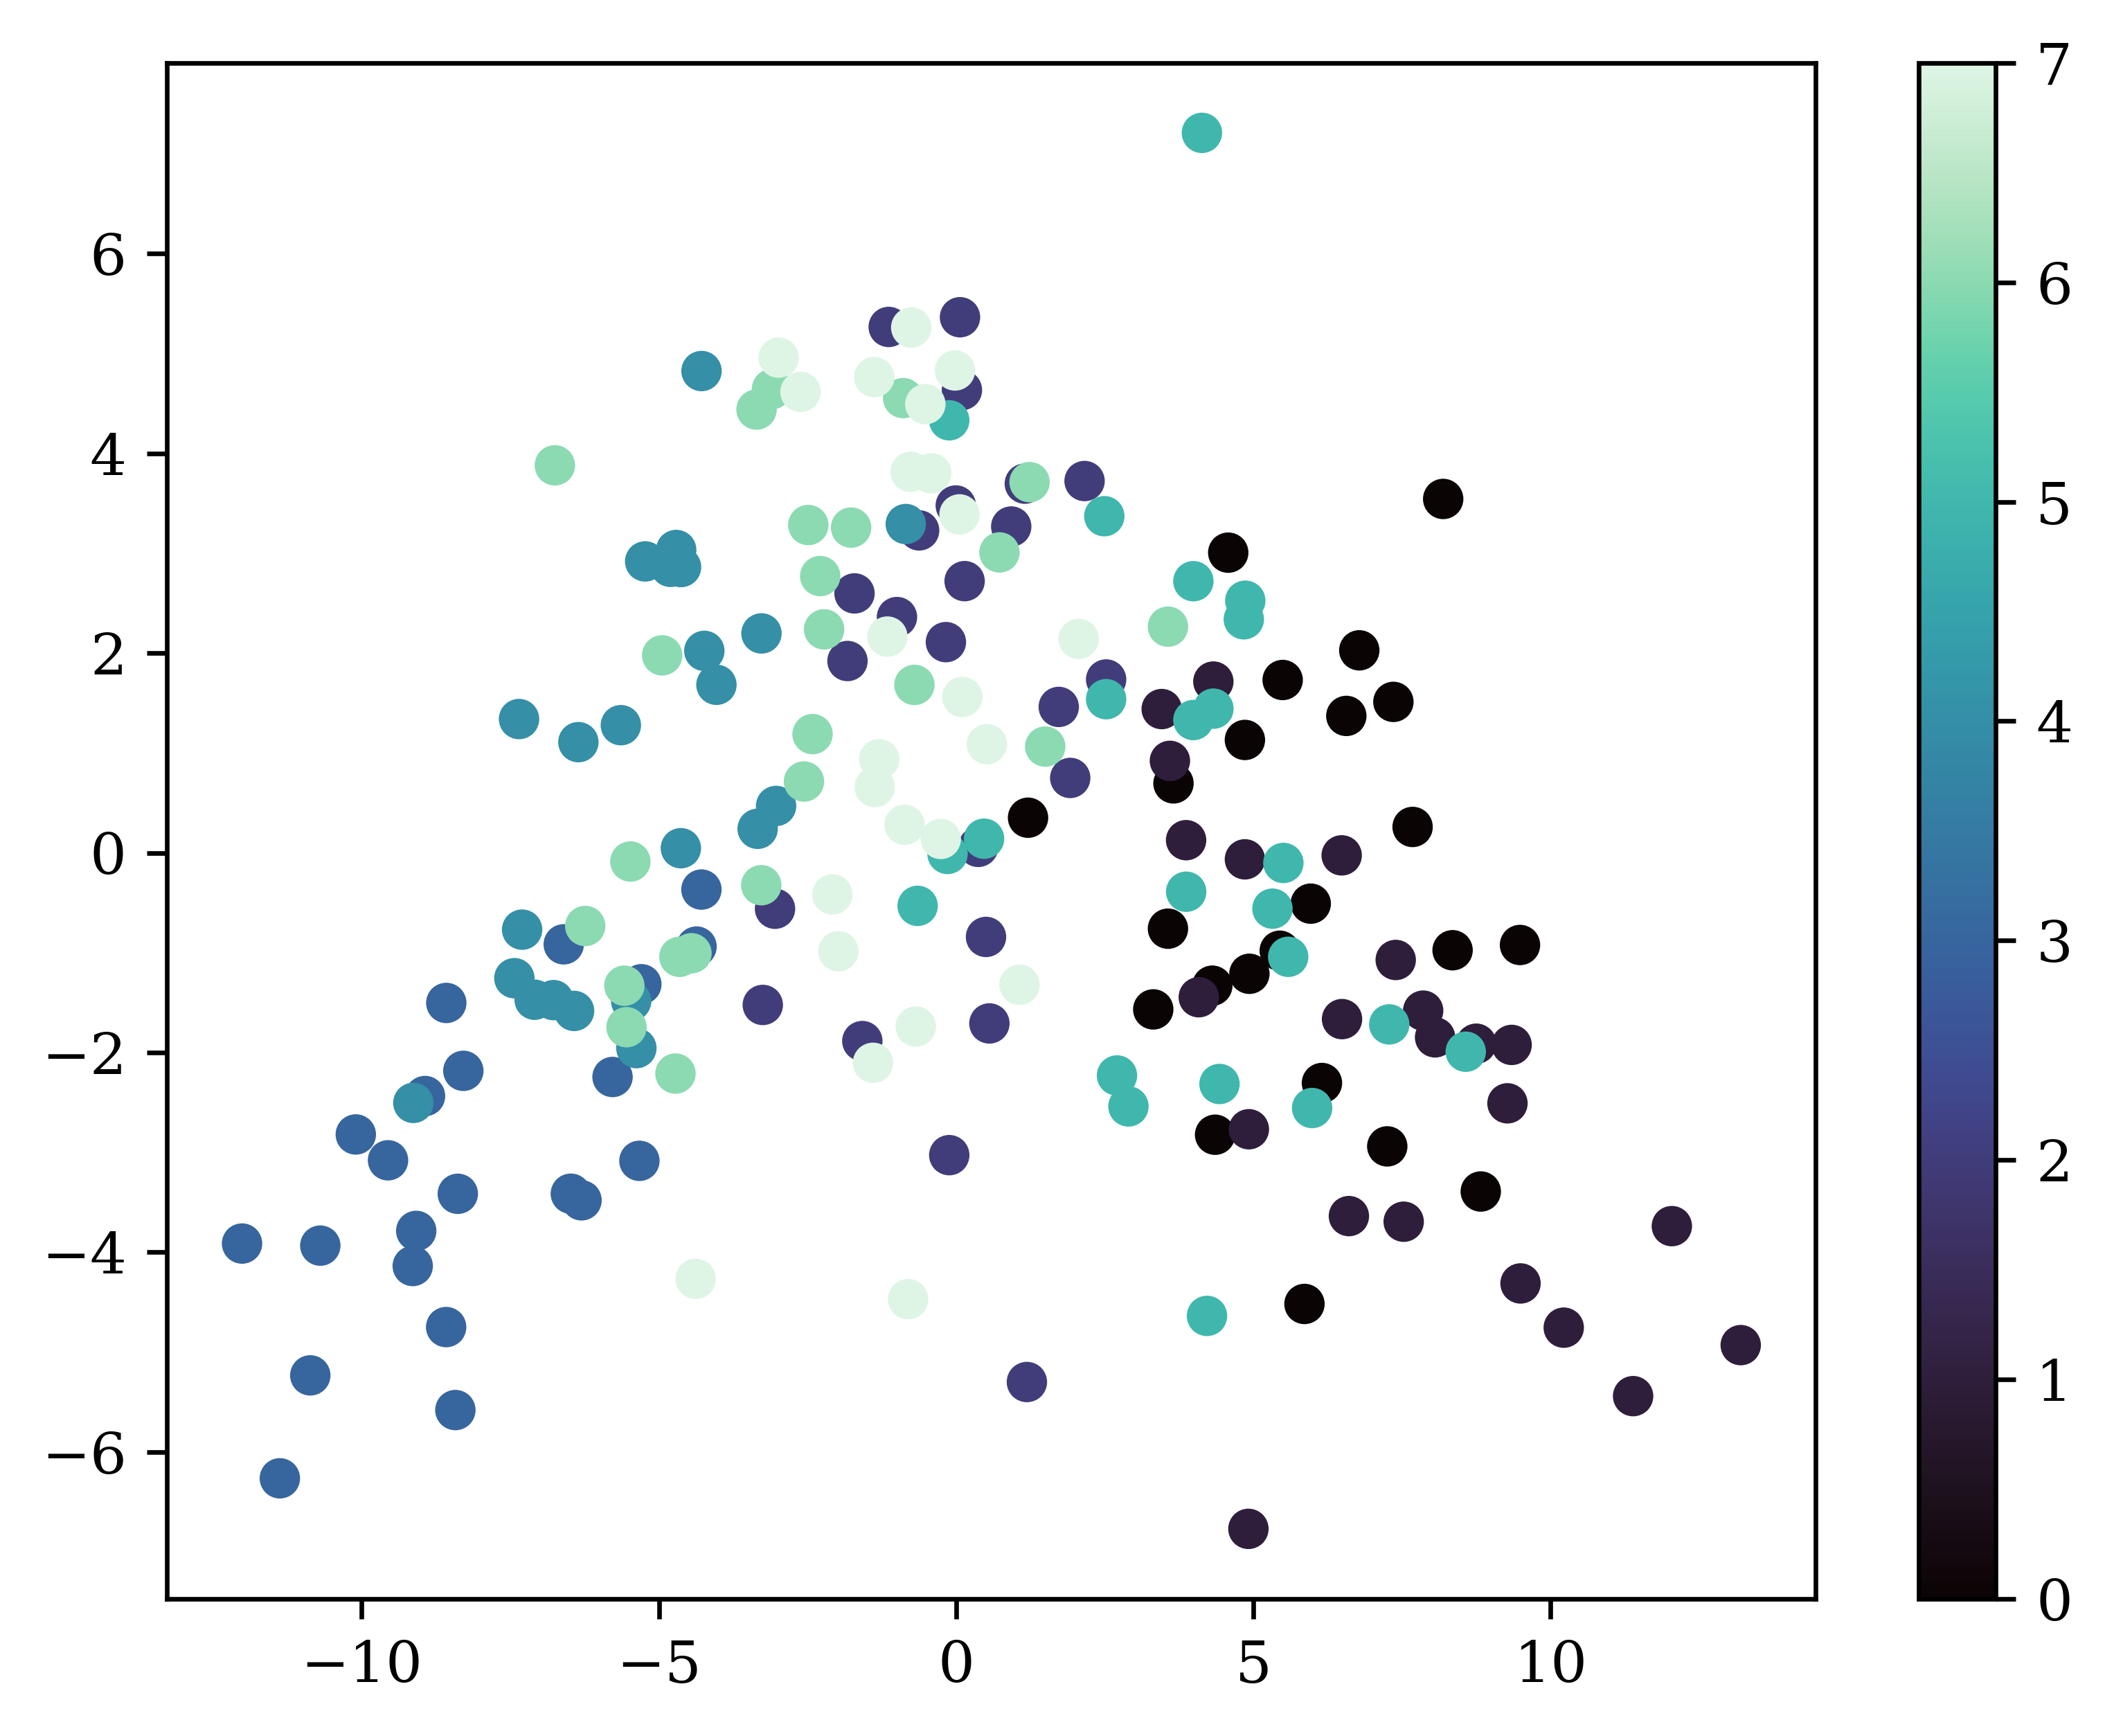

In [39]:
x = []
y = []
c = []
for i, (age, _df) in enumerate(pc_df.groupby('age')):
    x.extend(_df[0])
    y.extend(_df[1])
    c.extend([i] * len(_df))
plt.scatter(x, y, c=c, cmap='mako')
plt.colorbar()

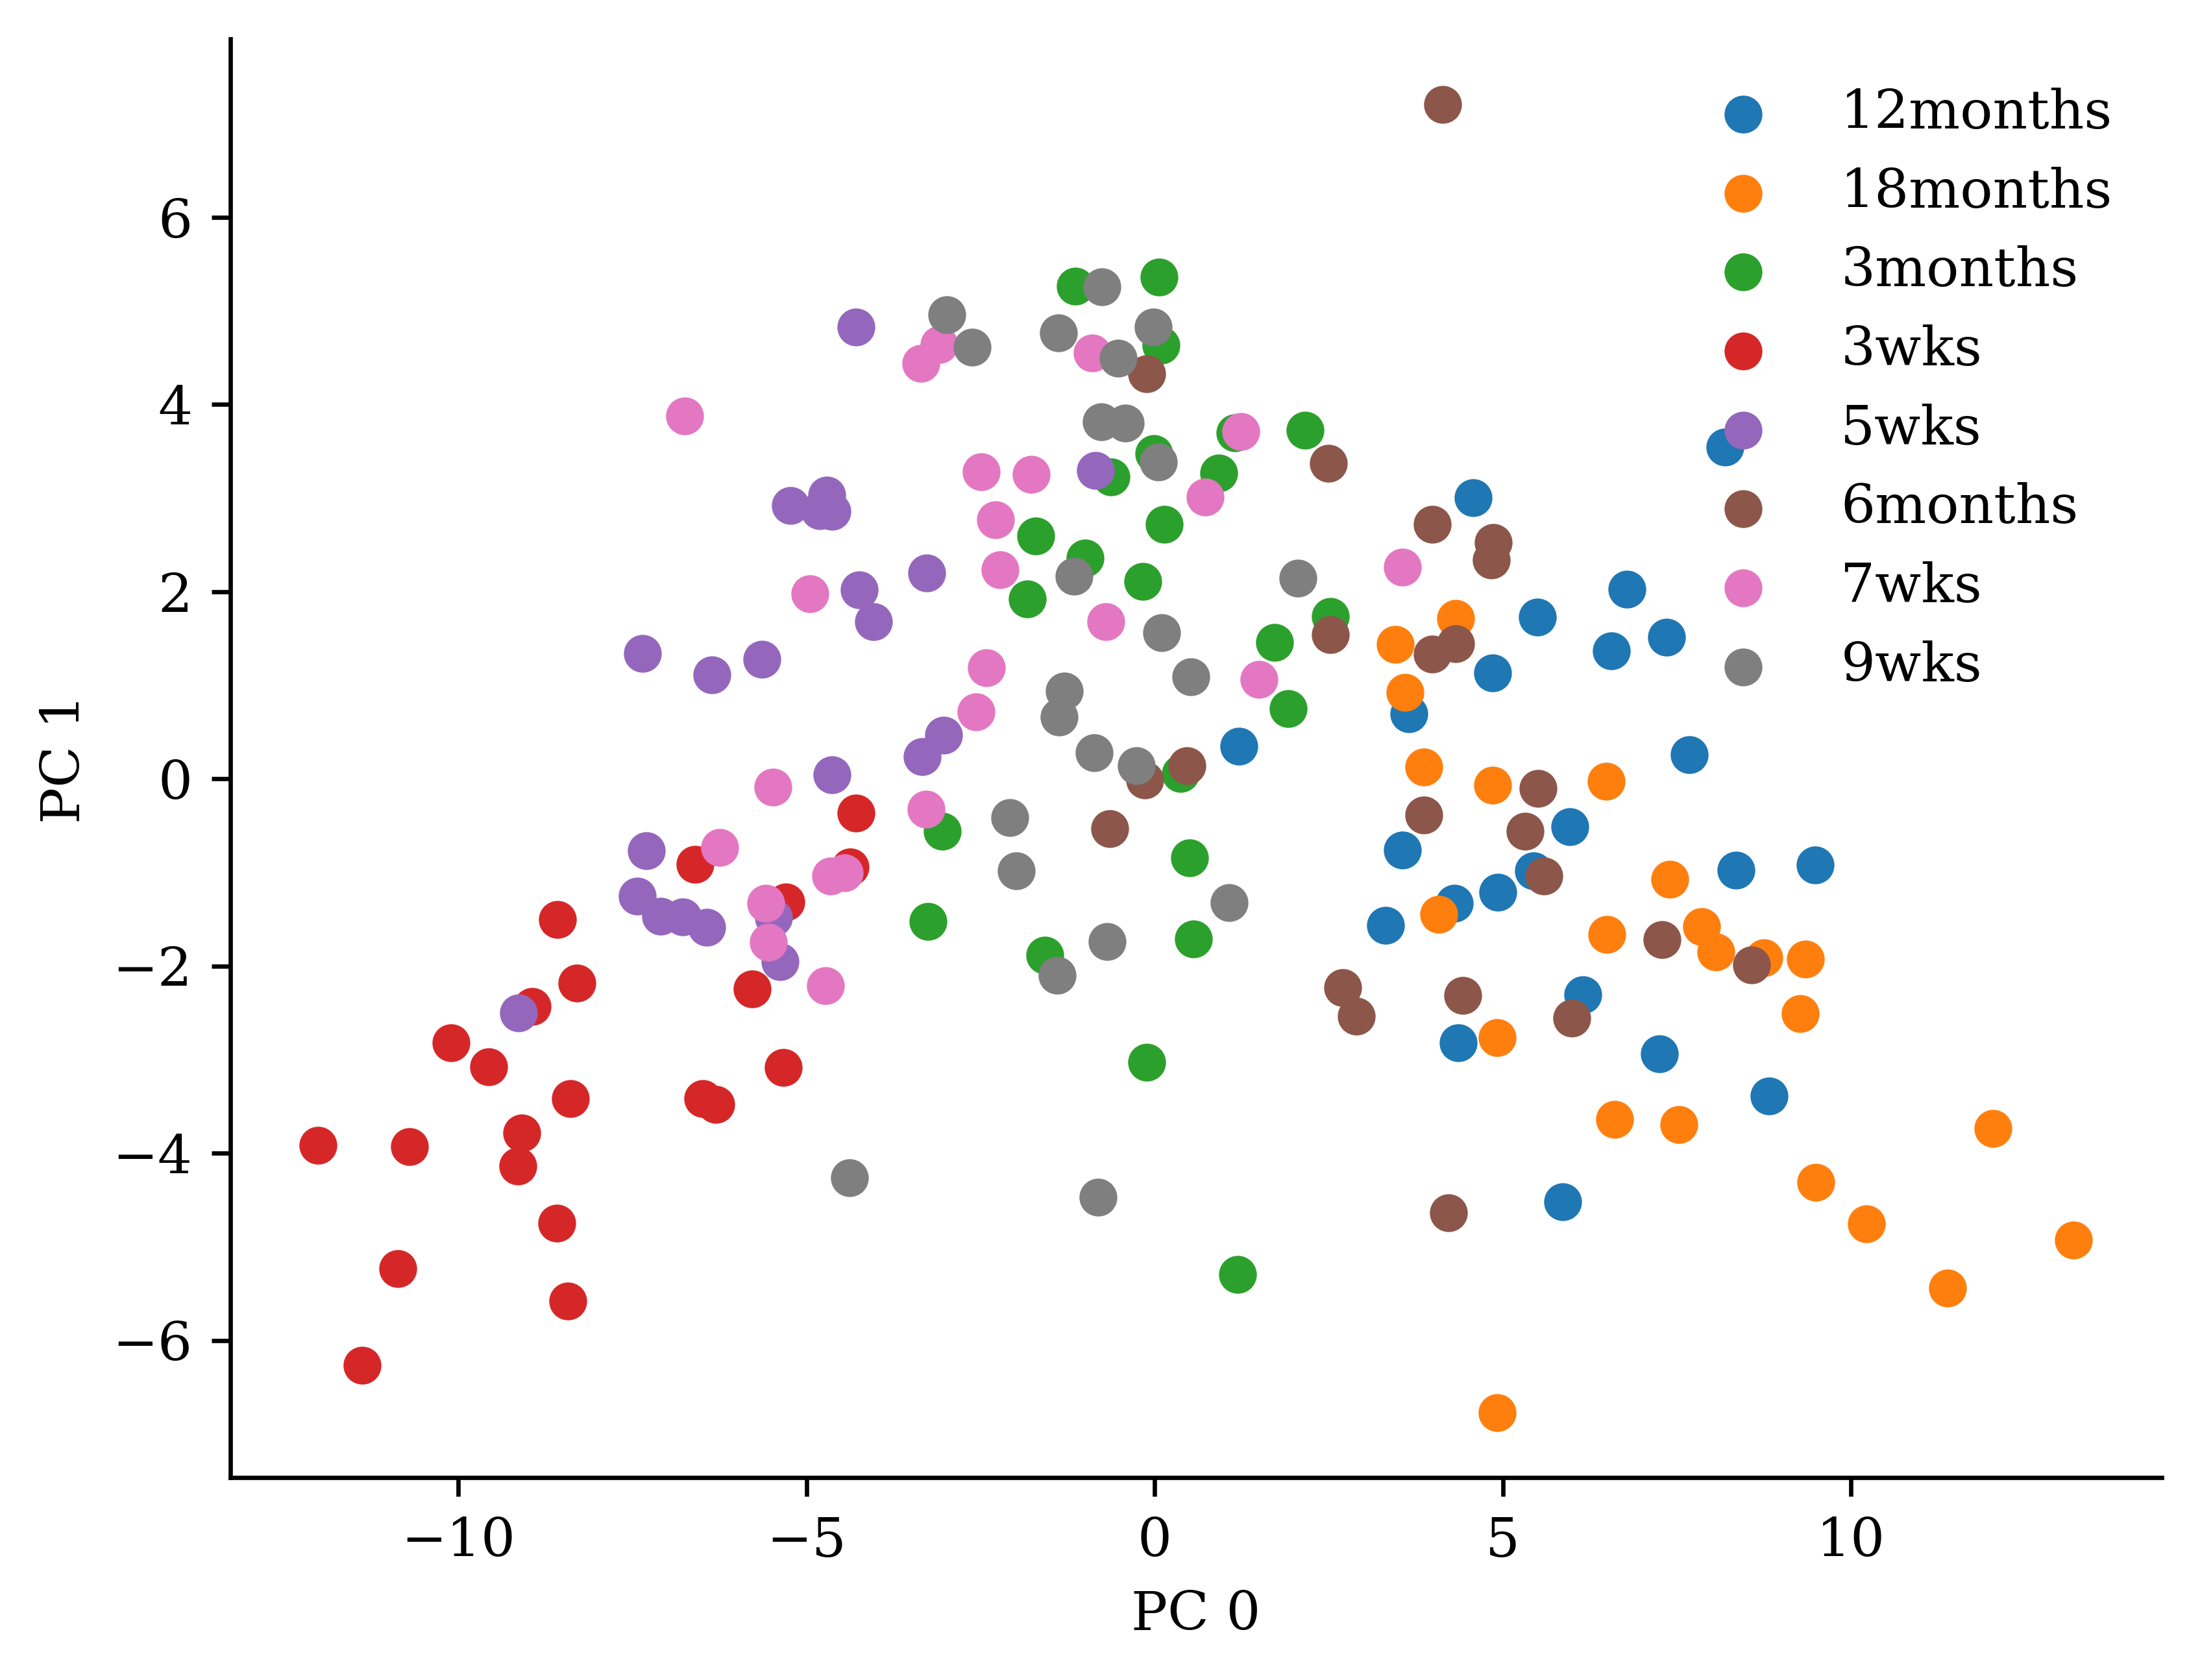

In [43]:
for i, (age, _df) in enumerate(pc_df.groupby('age')):
    plt.scatter(_df[0], _df[1], label=age)
plt.xlabel("PC 0")
plt.ylabel("PC 1")
plt.legend(frameon=False)
sns.despine()